In [27]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mlchartist.array_builder import build_arrays
from mlchartist.preprocessing import thresholds_encoding, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Function implementation from marcin_first_model

In [2]:
def stocks_selector_local(min_len = 2000, num_samp = 2, path='../raw_data/processed/'):
    """
    Returns a concatened Pandas DataFrame of the stocks data

    Randomly select the number of stocks (`num_samp`) in the `path` directory according their
        minimal lenght (`min_len` in days)
    """

    filenames = []

    for file in os.listdir(path):
        if file.endswith('.csv'):
            with open(path + file) as f:
                rows_num = sum(1 for line in f)
                if rows_num >= min_len:
                    filenames.append(file)
                    
    if len(filenames) < num_samp:
        print('Sample size bigger that nuber of companies available')
    else:
        sample = random.sample(filenames, num_samp)
    
    dfs = []

    for ticker in sample:
        ticker_df = pd.read_csv('../raw_data/processed/'+ticker)
        dfs.append(ticker_df)
    
    return pd.concat(dfs)

In [35]:
def building_X_y(train_df, test_df, input_cols, target_col, time_window, stride):
    """
    Returns X_train, y_train, X_test, y_test using build_arrays()
    """
    tickers = train_df['ticker'].unique()
    
    train_x_dfs = []
    train_y_dfs = []
    test_x_dfs = []
    test_y_dfs = []
    
    for ticker in tickers:
        ticker_train_df = train_df[train_df['ticker'] == ticker]
        ticker_test_df = test_df[test_df['ticker'] == ticker]
        ticker_train_x, ticker_train_y = build_arrays(ticker_train_df,input_cols=INPUT_COLS, target_col='20D_return_bin', time_window=6, stride=5)
        ticker_test_x, ticker_test_y = build_arrays(ticker_test_df,input_cols=INPUT_COLS, target_col='20D_return_bin', time_window=6, stride=5)
        train_x_dfs.append(ticker_train_x)
        train_y_dfs.append(ticker_train_y)
        test_x_dfs.append(ticker_test_x)
        test_y_dfs.append(ticker_test_y)
    
    X_train = np.concatenate(train_x_dfs)
    y_train = np.concatenate(train_y_dfs)
    X_test = np.concatenate(test_x_dfs)
    y_test = np.concatenate(test_y_dfs)
    
    return X_train, y_train, X_test, y_test

KeyError: "['1D_past_return', '5D_past_return', '10D_past_return'] not in index"

# Model implementation

In [3]:
df = stocks_selector_local()

In [4]:
df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,AMBA,2012-11-29,61.906031,59.593919,63.129451,-3.993665e+06,5921412,0.482452,45.611538,26.631955,13.730042,0.571428,-0.055118,0.626545,0.043678,0.074713,0.264368
1,AMBA,2012-11-30,62.048436,60.098995,60.267354,-4.024919e+06,5969721,0.472270,44.599123,25.241459,13.166784,0.532065,-0.075584,0.607649,0.035591,0.044776,0.280138
2,AMBA,2012-12-03,61.065089,56.544503,58.745805,-4.076182e+06,5918458,0.474965,44.029650,26.177662,12.142373,0.491971,-0.092543,0.584514,0.005767,0.153403,0.378316
3,AMBA,2012-12-04,60.040371,54.210526,56.951341,-4.080604e+06,5719452,0.489253,42.164729,23.564475,16.402152,0.451761,-0.106202,0.557963,0.033604,0.200463,0.359212
4,AMBA,2012-12-05,65.496311,72.631579,61.128869,-3.932964e+06,5867092,0.488592,40.444675,21.964949,15.237302,0.443029,-0.091947,0.534976,0.034521,0.133630,0.322940


## Preprocessing

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df = thresholds_encoding(df)

In [12]:
df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,AMBA,2012-11-29,61.906031,59.593919,63.129451,-3.993665e+06,5921412,0.482452,45.611538,26.631955,13.730042,0.571428,-0.055118,0.626545,1,1,1
1,AMBA,2012-11-30,62.048436,60.098995,60.267354,-4.024919e+06,5969721,0.472270,44.599123,25.241459,13.166784,0.532065,-0.075584,0.607649,1,1,1
2,AMBA,2012-12-03,61.065089,56.544503,58.745805,-4.076182e+06,5918458,0.474965,44.029650,26.177662,12.142373,0.491971,-0.092543,0.584514,1,1,1
3,AMBA,2012-12-04,60.040371,54.210526,56.951341,-4.080604e+06,5719452,0.489253,42.164729,23.564475,16.402152,0.451761,-0.106202,0.557963,1,1,1
4,AMBA,2012-12-05,65.496311,72.631579,61.128869,-3.932964e+06,5867092,0.488592,40.444675,21.964949,15.237302,0.443029,-0.091947,0.534976,1,1,1


In [21]:
train_df, test_df = train_test_split(df, '3Y')
test_df.head()

In [23]:
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal',
              'ADI', 'OBV', 'ATR', 'ADX', 'ADX_pos',
              'ADX_neg', 'MACD', 'MACD_diff', 'MACD_signal']

scaler = RobustScaler()

scaler.fit(train_df[INPUT_COLS])

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [24]:
train_df.loc[:, INPUT_COLS] = scaler.transform(train_df[INPUT_COLS])
test_df.loc[:, INPUT_COLS] = scaler.transform(test_df[INPUT_COLS])

In [25]:
train_df

,date,ticker,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,2012-11-29,AMBA,0.342121,0.033852,0.107899,-0.575354,-0.256129,-0.497352,1.390441,0.249784,-0.628363,0.038254,-0.076123,0.059041,1,1,1
1,2012-11-30,AMBA,0.349032,0.043653,0.050305,-0.580782,-0.254234,-0.501426,1.316284,0.139333,-0.680432,0.018887,-0.106545,0.048879,1,1,1
2,2012-12-03,AMBA,0.301306,-0.025323,0.019687,-0.589685,-0.256245,-0.500348,1.274571,0.213698,-0.775130,-0.000840,-0.131753,0.036437,1,1,1
3,2012-12-04,AMBA,0.251572,-0.070615,-0.016423,-0.590453,-0.264054,-0.494631,1.137968,0.006125,-0.381349,-0.020624,-0.152057,0.022159,1,1,1
4,2012-12-05,AMBA,0.516373,0.286855,0.067641,-0.564811,-0.258261,-0.494896,1.011977,-0.120931,-0.489030,-0.024921,-0.130868,0.009797,1,1,1
5,2012-12-06,AMBA,0.583889,0.099230,0.110694,-0.566320,-0.241550,-0.480853,0.982606,0.300253,-0.679269,-0.026846,-0.108186,-0.000514,1,1,1
6,2012-12-07,AMBA,0.501465,-0.031038,0.124374,-0.572294,-0.246198,-0.486960,0.955333,0.204983,-0.732857,-0.033171,-0.100675,-0.010145,1,1,1
7,2012-12-10,AMBA,0.120936,-0.485855,-0.142718,-0.580980,-0.249368,-0.483485,0.853020,0.023153,-0.435701,-0.052292,-0.125591,-0.022029,1,1,1
8,2012-12-11,AMBA,0.285475,-0.182644,-0.240150,-0.576156,-0.245931,-0.486546,0.758016,-0.086353,-0.520455,-0.061594,-0.121796,-0.033571,1,1,1
9,2012-12-12,AMBA,0.545977,0.378297,-0.098660,-0.564716,-0.238481,-0.485959,0.727207,0.217285,-0.623302,-0.056427,-0.083786,-0.041674,1,1,1


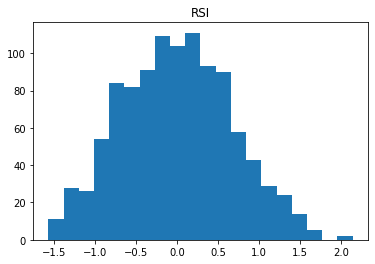

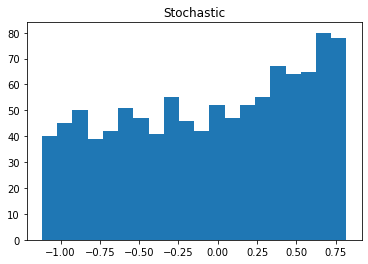

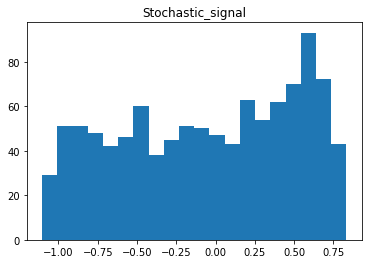

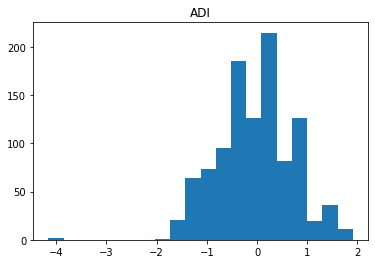

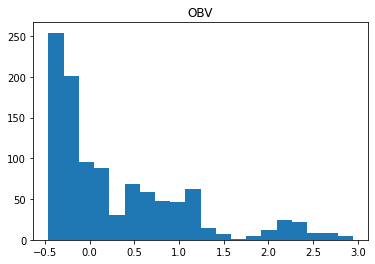

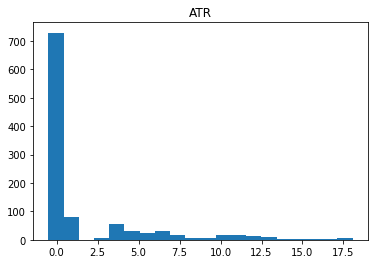

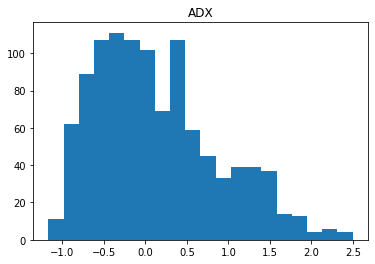

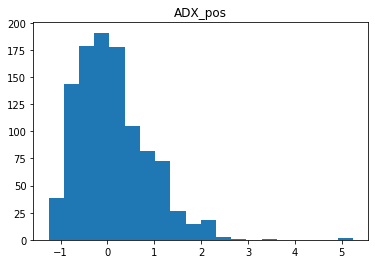

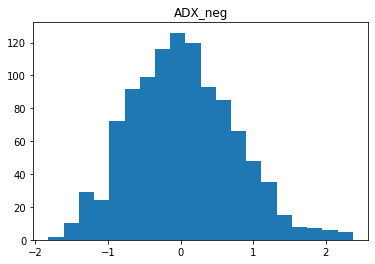

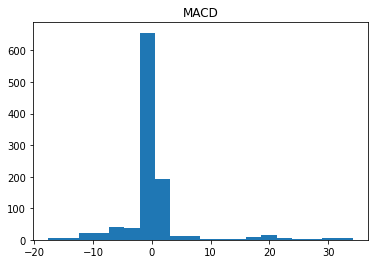

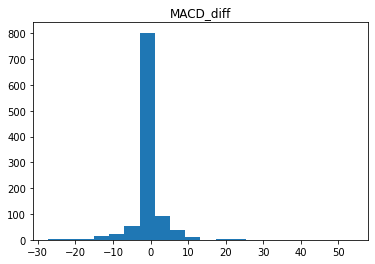

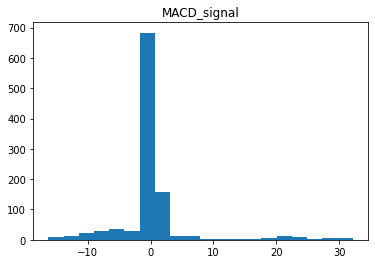

In [28]:
for col in INPUT_COLS:
    plt.hist(train_df[col], bins=20)
    plt.title(col)
    plt.show()

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1949.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 50 artists>)

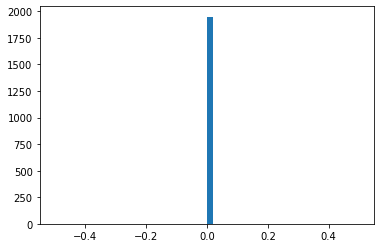

In [29]:
plt.hist(df['10TD_return'], bins=50, range=(-0.5, 0.5))

In [50]:
(df['10TD_return'] == 0).sum()/len(df)*100

47.98129000492368

In [51]:
#(train_df['10D_past_return'] > 0.8).sum()

In [52]:
OUTPUT_COLS = ['5TD_return', '10TD_return', '20TD_return']

In [53]:
tickers = train_df['ticker'].unique()

In [54]:
train_x_dfs = []
train_y_dfs = []
test_x_dfs = []
test_y_dfs = []

In [55]:
for ticker in tickers:
    ticker_train_df = train_df[train_df['ticker'] == ticker]
    ticker_test_df = test_df[test_df['ticker'] == ticker]
    ticker_train_x, ticker_train_y = build_arrays(ticker_train_df,input_cols=INPUT_COLS, target_col='20TD_return', time_window=6, stride=5)
    ticker_test_x, ticker_test_y = build_arrays(ticker_test_df,input_cols=INPUT_COLS, target_col='20TD_return', time_window=6, stride=5)
    train_x_dfs.append(ticker_train_x)
    train_y_dfs.append(ticker_train_y)
    test_x_dfs.append(ticker_test_x)
    test_y_dfs.append(ticker_test_y)

In [56]:
X_train = np.concatenate(train_x_dfs)
y_train = np.concatenate(train_y_dfs)
X_test = np.concatenate(test_x_dfs)
y_test = np.concatenate(test_y_dfs)

In [57]:
y_train.shape

(210,)

In [58]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [59]:
X_train.shape

(210, 6, 12)

In [60]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

from tensorflow.keras.backend import expand_dims
X_train = expand_dims(X_train, axis=-1)
X_test = expand_dims(X_test, axis=-1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[30000])
plt.show()
plt.imshow(X_train[100000])

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam

optim = RMSprop(learning_rate=0.0000001)

def init_model():
    model = Sequential()
    model.add(layers.LSTM(200, return_sequences=True, input_shape=(6,12), activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    
    return model

In [63]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=8,
          validation_split=0.2,
          callbacks=[es]
         )

Epoch 1/500
21/21 [==============================] - 1s 67ms/step - loss: 0.6975 - accuracy: 0.5655 - val_loss: 0.6975 - val_accuracy: 0.4762
Epoch 2/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6924 - accuracy: 0.6250 - val_loss: 0.6975 - val_accuracy: 0.4762
Epoch 3/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6898 - accuracy: 0.6369 - val_loss: 0.6975 - val_accuracy: 0.4762
Epoch 4/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6871 - accuracy: 0.6548 - val_loss: 0.6975 - val_accuracy: 0.4762
Epoch 5/500
21/21 [==============================] - 1s 27ms/step - loss: 0.7006 - accuracy: 0.5476 - val_loss: 0.6975 - val_accuracy: 0.4762
Epoch 6/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6930 - accuracy: 0.5595 - val_loss: 0.6975 - val_accuracy: 0.4762
Epoch 7/500
21/21 [==============================] - 1s 37ms/step - loss: 0.6929 - accuracy: 0.5714 - val_loss: 0.6974 - val_accuracy: 0.4762
Epoch 

21/21 [==============================] - 1s 29ms/step - loss: 0.6892 - accuracy: 0.5774 - val_loss: 0.6973 - val_accuracy: 0.4762
Epoch 59/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6953 - accuracy: 0.5893 - val_loss: 0.6973 - val_accuracy: 0.4762
Epoch 60/500
21/21 [==============================] - 1s 34ms/step - loss: 0.6891 - accuracy: 0.6012 - val_loss: 0.6972 - val_accuracy: 0.4762
Epoch 61/500
21/21 [==============================] - 1s 31ms/step - loss: 0.6933 - accuracy: 0.6071 - val_loss: 0.6972 - val_accuracy: 0.4762
Epoch 62/500
21/21 [==============================] - 1s 30ms/step - loss: 0.6938 - accuracy: 0.6071 - val_loss: 0.6972 - val_accuracy: 0.4762
Epoch 63/500
21/21 [==============================] - 1s 30ms/step - loss: 0.6894 - accuracy: 0.5893 - val_loss: 0.6972 - val_accuracy: 0.4762
Epoch 64/500
21/21 [==============================] - 1s 30ms/step - loss: 0.6949 - accuracy: 0.6131 - val_loss: 0.6972 - val_accuracy: 0.4762
Epoch 65/500

21/21 [==============================] - 1s 28ms/step - loss: 0.6916 - accuracy: 0.5952 - val_loss: 0.6971 - val_accuracy: 0.4762
Epoch 116/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6852 - accuracy: 0.6190 - val_loss: 0.6971 - val_accuracy: 0.4762
Epoch 117/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6975 - accuracy: 0.5655 - val_loss: 0.6970 - val_accuracy: 0.4762
Epoch 118/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6900 - accuracy: 0.5952 - val_loss: 0.6970 - val_accuracy: 0.4762
Epoch 119/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6892 - accuracy: 0.5952 - val_loss: 0.6970 - val_accuracy: 0.4762
Epoch 120/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6912 - accuracy: 0.5774 - val_loss: 0.6970 - val_accuracy: 0.4762
Epoch 121/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6840 - accuracy: 0.6071 - val_loss: 0.6970 - val_accuracy: 0.4762
Epoch 

Epoch 172/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6901 - accuracy: 0.5655 - val_loss: 0.6969 - val_accuracy: 0.4762
Epoch 173/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6926 - accuracy: 0.5952 - val_loss: 0.6969 - val_accuracy: 0.4762
Epoch 174/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6951 - accuracy: 0.5893 - val_loss: 0.6968 - val_accuracy: 0.4762
Epoch 175/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6904 - accuracy: 0.5952 - val_loss: 0.6968 - val_accuracy: 0.4762
Epoch 176/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6918 - accuracy: 0.5893 - val_loss: 0.6968 - val_accuracy: 0.4762
Epoch 177/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6913 - accuracy: 0.5774 - val_loss: 0.6968 - val_accuracy: 0.4762
Epoch 178/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6895 - accuracy: 0.6131 - val_loss: 0.6968 - val_accuracy:

Epoch 229/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6859 - accuracy: 0.6488 - val_loss: 0.6967 - val_accuracy: 0.4762
Epoch 230/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6898 - accuracy: 0.5952 - val_loss: 0.6967 - val_accuracy: 0.4762
Epoch 231/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6886 - accuracy: 0.6190 - val_loss: 0.6967 - val_accuracy: 0.4762
Epoch 232/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6927 - accuracy: 0.5774 - val_loss: 0.6967 - val_accuracy: 0.4762
Epoch 233/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6939 - accuracy: 0.6190 - val_loss: 0.6966 - val_accuracy: 0.4762
Epoch 234/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6856 - accuracy: 0.5952 - val_loss: 0.6966 - val_accuracy: 0.4762
Epoch 235/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6881 - accuracy: 0.6310 - val_loss: 0.6966 - val_accuracy:

Epoch 286/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6844 - accuracy: 0.6548 - val_loss: 0.6965 - val_accuracy: 0.4762
Epoch 287/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6795 - accuracy: 0.6488 - val_loss: 0.6965 - val_accuracy: 0.4762
Epoch 288/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6870 - accuracy: 0.6190 - val_loss: 0.6965 - val_accuracy: 0.4762
Epoch 289/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6845 - accuracy: 0.6310 - val_loss: 0.6965 - val_accuracy: 0.4762
Epoch 290/500
21/21 [==============================] - 1s 33ms/step - loss: 0.6892 - accuracy: 0.6131 - val_loss: 0.6965 - val_accuracy: 0.4762
Epoch 291/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6889 - accuracy: 0.6190 - val_loss: 0.6965 - val_accuracy: 0.4762
Epoch 292/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6811 - accuracy: 0.6369 - val_loss: 0.6965 - val_accuracy:

Epoch 343/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6891 - accuracy: 0.6429 - val_loss: 0.6963 - val_accuracy: 0.4762
Epoch 344/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6847 - accuracy: 0.6071 - val_loss: 0.6963 - val_accuracy: 0.4762
Epoch 345/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6886 - accuracy: 0.6131 - val_loss: 0.6963 - val_accuracy: 0.4762
Epoch 346/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6839 - accuracy: 0.6310 - val_loss: 0.6963 - val_accuracy: 0.4762
Epoch 347/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6910 - accuracy: 0.6012 - val_loss: 0.6963 - val_accuracy: 0.4762
Epoch 348/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6866 - accuracy: 0.6131 - val_loss: 0.6963 - val_accuracy: 0.4762
Epoch 349/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6915 - accuracy: 0.5893 - val_loss: 0.6963 - val_accuracy:

Epoch 400/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6796 - accuracy: 0.6548 - val_loss: 0.6961 - val_accuracy: 0.4762
Epoch 401/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6878 - accuracy: 0.5952 - val_loss: 0.6961 - val_accuracy: 0.4762
Epoch 402/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6802 - accuracy: 0.6845 - val_loss: 0.6961 - val_accuracy: 0.4762
Epoch 403/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6895 - accuracy: 0.6131 - val_loss: 0.6961 - val_accuracy: 0.4762
Epoch 404/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6841 - accuracy: 0.6071 - val_loss: 0.6961 - val_accuracy: 0.4762
Epoch 405/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6835 - accuracy: 0.6310 - val_loss: 0.6961 - val_accuracy: 0.4762
Epoch 406/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6868 - accuracy: 0.6369 - val_loss: 0.6961 - val_accuracy:

Epoch 457/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6817 - accuracy: 0.6250 - val_loss: 0.6959 - val_accuracy: 0.4524
Epoch 458/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6829 - accuracy: 0.6190 - val_loss: 0.6959 - val_accuracy: 0.4524
Epoch 459/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6823 - accuracy: 0.6190 - val_loss: 0.6959 - val_accuracy: 0.4524
Epoch 460/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6812 - accuracy: 0.6369 - val_loss: 0.6959 - val_accuracy: 0.4524
Epoch 461/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6816 - accuracy: 0.6369 - val_loss: 0.6959 - val_accuracy: 0.4524
Epoch 462/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6849 - accuracy: 0.6012 - val_loss: 0.6959 - val_accuracy: 0.4524
Epoch 463/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6871 - accuracy: 0.6131 - val_loss: 0.6959 - val_accuracy:

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred.shape

(300, 1)

In [66]:
y_test.sum()/len(y_test)

0.5366666666666666

In [67]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 11ms/step - loss: 0.6896 - accuracy: 0.5367


[0.6895826458930969, 0.5366666913032532]

In [68]:
for i in range(0, len(y_pred), 500):
    print(f'Predicted {y_pred[i][0] >= 0.5}, test {y_test[i]}')

Predicted True, test 1.0


In [ ]:
def initialize_model_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(30, 4, 1), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [ ]:
model_2 = initialize_model_2()

model_2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
es = EarlyStopping(patience=5, restore_best_weights=True)

model_2.fit(X_train, y_train, 
          epochs=200, 
          batch_size=8,
          validation_split=0.2,
            callbacks=[es]
         )

In [ ]:
y_test.sum()/y_test.shape[0]

In [ ]:
y_pred = model.predict(X_test)